In [ ]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
#9.10

Loding the MNIST data from keras.dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#shape of numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images
Test data = 10,000 Images

Image Dimention --> 28 * 28
Grayscale Image --> 1 Channel

In [ ]:
#printing the 10th image
print(x_train[10])

In [ ]:
print(x_train[10].shape)

(28, 28)


In [ ]:
import matplotlib.pyplot as plt

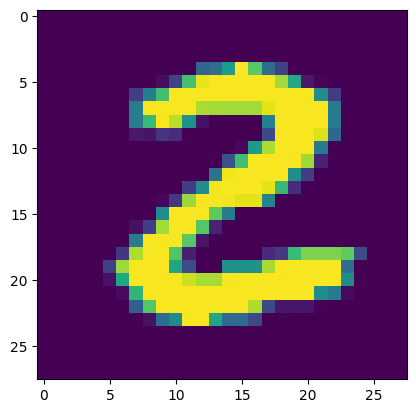

2


In [ ]:
# Display the image
plt.imshow(x_train[25])
plt.show()
#Print the corresponding lable
print(y_train[25])

Image lables

In [ ]:
print(y_train.shape, y_train.shape)

(60000,) (60000,)


In [ ]:
#Unique values in y_train
print(np.unique(y_train))
#Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can ue these lables as such or we can also apply One Hot Encoding

All images are in same dimention

In [ ]:
#scaling the value(for more accuracy: dividing by max value as all values between 0 to 1 as easy for neural network to understand)
x_train = x_train/255
x_test = x_test/255

In [ ]:
#printing the 10th image
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building The Neural Network

In [ ]:
#cnn = lot of concept: used on image data
#RNN = working with text and audio recognition

In [ ]:
#Setting layers og NN
model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(50,activation='relu'),
                           keras.layers.Dense(50,activation='relu'),
                           keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
#compiling the NN
# Different optimizers change the accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the NN
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2992 - accuracy: 0.9134
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0847 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0517 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.035

Loss id diff  between true and predicted value.

if loss value is high then it is model is not working properly
i.e making wrong predictions

goal is to min loss function and inc accurecy

Training Data ACcuracy is 98.9%

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9731


In [ ]:
print(accuracy)

0.9731000065803528


Test DAta Accuracy = 97.1%

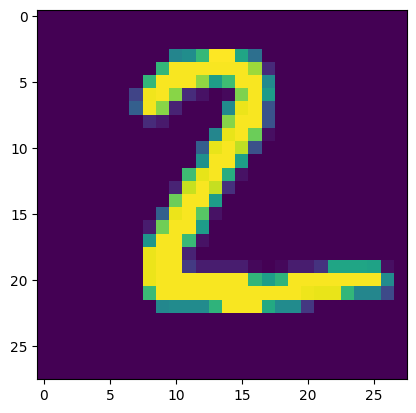

In [ ]:
#First data point is x_test
plt.imshow(x_test[1])
plt.show()

In [ ]:
print(y_test[1])

2


In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[4.8231763e-05 3.5922494e-02 2.3852870e-02 7.8298795e-01 1.3697823e-04
 1.7645252e-03 1.8960090e-08 9.9999070e-01 1.5906759e-02 2.6688704e-01]


model.predict gives the prediction probability of each class for the perticular data point

In [ ]:
#converting the prdiction probability to class lable
lable_for_first_test_image = np.argmax(y_pred[0])
print(lable_for_first_test_image)

7


In [ ]:
#Converting the prediction probability to classs label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ----> True labels

y_pred_labels ---> Predicted labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 973    0    0    2    0    2    0    1    2    0]
 [   0 1123    2    0    0    0    2    1    7    0]
 [   6    2 1007    3    0    0    1    5    6    2]
 [   0    0    2  970    1   27    0    4    3    3]
 [   1    0    4    0  963    1    3    3    2    5]
 [   1    0    0    8    1  873    1    2    4    2]
 [   4    1    2    1    6   23  918    0    3    0]
 [   0    7   14    1    1    0    0  993    7    5]
 [   2    1    1    7    2    8    1    4  945    3]
 [   3    6    1    7   11    2    0    9    5  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

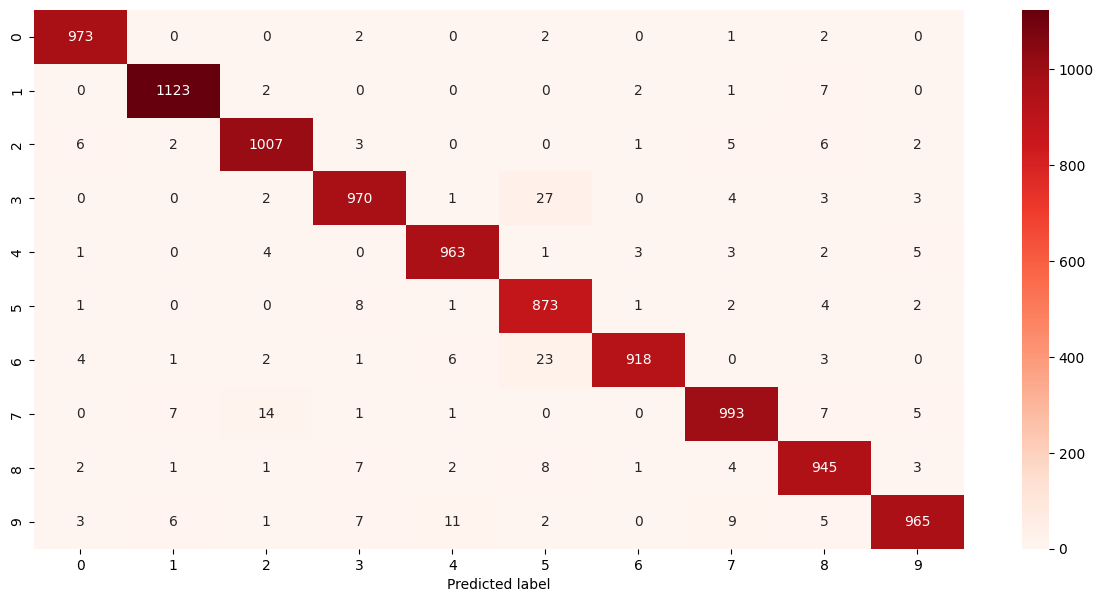

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted label')

Building a predictive system


In [ ]:
input_image_path='/content/8_1.jpg'
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(28, 28, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(28, 28)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 23ms/step
[[4.6679599e-04 5.2497827e-04 9.8807585e-01 9.9860984e-01 3.6036872e-07
  1.0490605e-01 1.3436018e-03 5.3291638e-05 9.9926651e-01 8.0203890e-06]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

8


**Predictive** **System**

In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten Digit is recognized as', input_pred_label)

Path of the image to be predicted:/content/3_14.jpg


1/1 [==============================] - 0s 22ms/step
The handwritten Digit is recognized as 3
